<a href="https://colab.research.google.com/github/Sreeja0522/Data-Analytics-Project---Pollution-Dataset/blob/main/EDA_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PACE : Analyze Stage**

 Perform EDA (analyze relationships between variables using plots and visualize the data using R).


---




**Step 2. Data Exploration (Continue EDA)**

Let's begin by understanding of the distrubution of the main feature Air Quality.

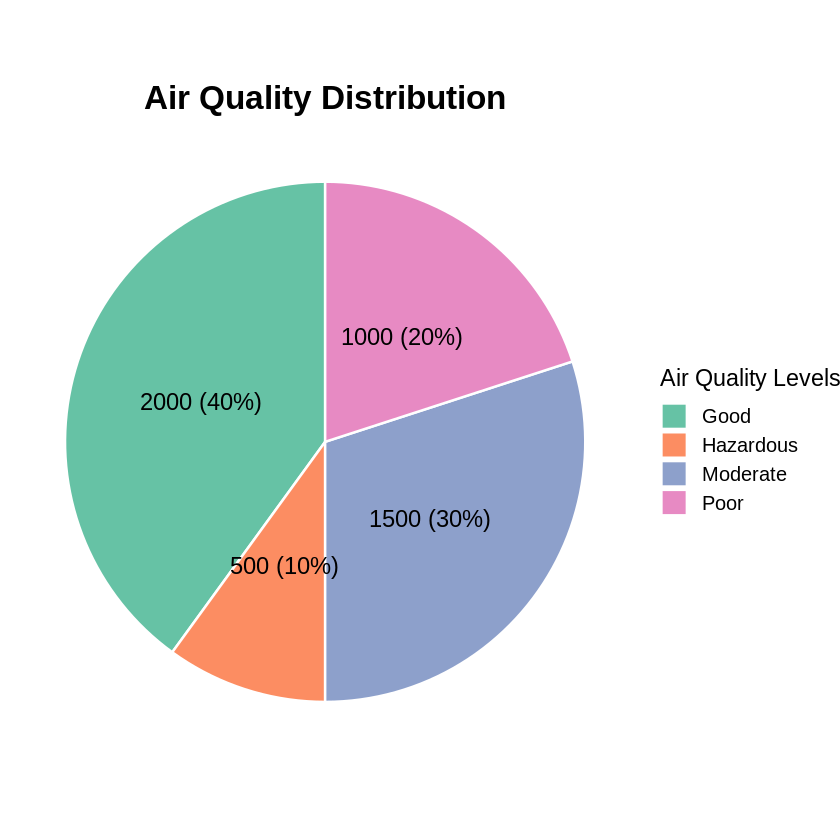

In [5]:
library(ggplot2)
data <- read.csv("pollution_dataset.csv")

# Creating Pie Chart
ggplot(data, aes(x = "", fill = Air.Quality)) +
  geom_bar(width = 1, color = "white", size = 0.7) +
  coord_polar("y", start = 0) +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Air Quality Distribution", fill = "Air Quality Levels") +
  theme_void(base_size = 16) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  ) +
  geom_text(aes(label = paste0(..count.., " (", round(..count../sum(..count..) * 100, 1), "%)")),
            stat = "count",
            position = position_stack(vjust = 0.5), size = 5, color = "black")


From the pie chart we can further plan for further visualizations of Air Quality change with other features and immediate actions can include stricter regulations on industrial emissions, promoting alternative energy sources, and improving urban planning to reduce pollution sources based on the results.

---

> Bar Chart


 **Bar Charts** clearly show the data of pollutant levels, highlighting differences between air quality levels (e.g., how much higher pollutants like PM2.5 or NO2 are in "Poor" or "Hazardous" air quality areas).


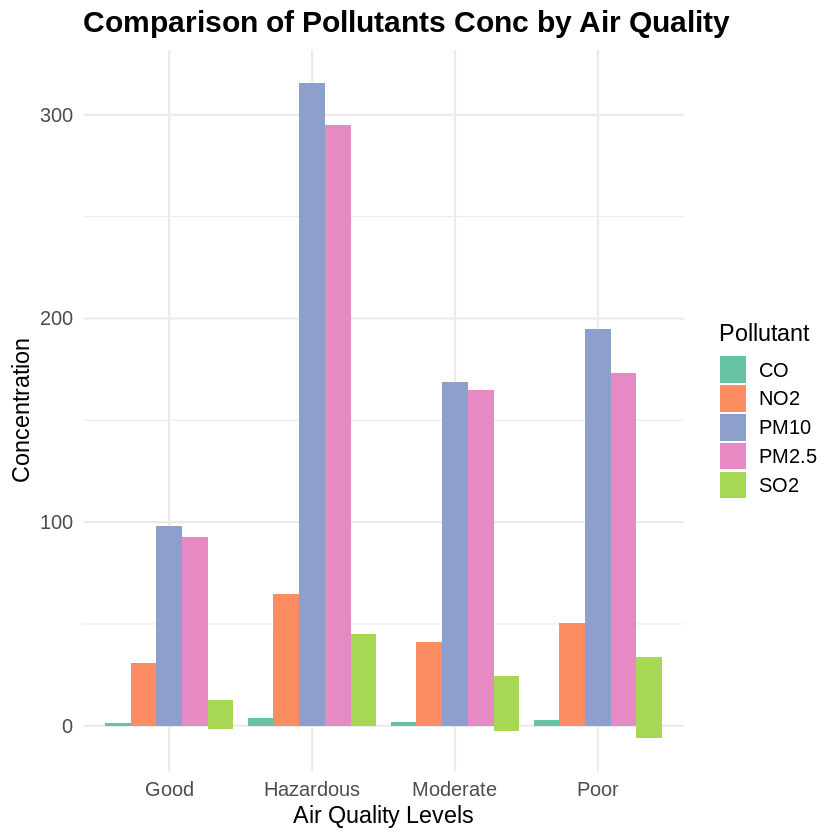

In [ ]:

library(ggplot2)
library(tidyr)

# Reshaping data to long format
data_long <- data %>%
  select(Air.Quality,  PM2.5, PM10, NO2, SO2, CO) %>%
  gather(key = "Pollutant", value = "Concentration", PM2.5, PM10, NO2, SO2, CO)

# Plotting the bar chart
ggplot(data_long, aes(x = Air.Quality, y = Concentration, fill = Pollutant)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Comparison of Pollutants Conc by Air Quality",
       x = "Air Quality Levels", y = "Concentration") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  ) +
  scale_fill_brewer(palette = "Set2")


**Insights:**
The concentration of pollutants, particularly PM2.5 and PM10, is highly correlated with air quality. Areas marked as Hazardous have the highest levels of particulate matter, while Good air quality areas show approximately 1/3rd of Pollutant concentration.

---





> Scatter plot


To show the correlation between **Temperature**, **Humidity**, and **Air Quality**, a scatter plot with color coding based on Air Quality is used here.

By looking at the color distribution across the plot, we can identify trends or patterns that indicate when and where air quality is most affected by temperature and humidity, helping to pinpoint areas that need targeted interventions based on weather patterns.





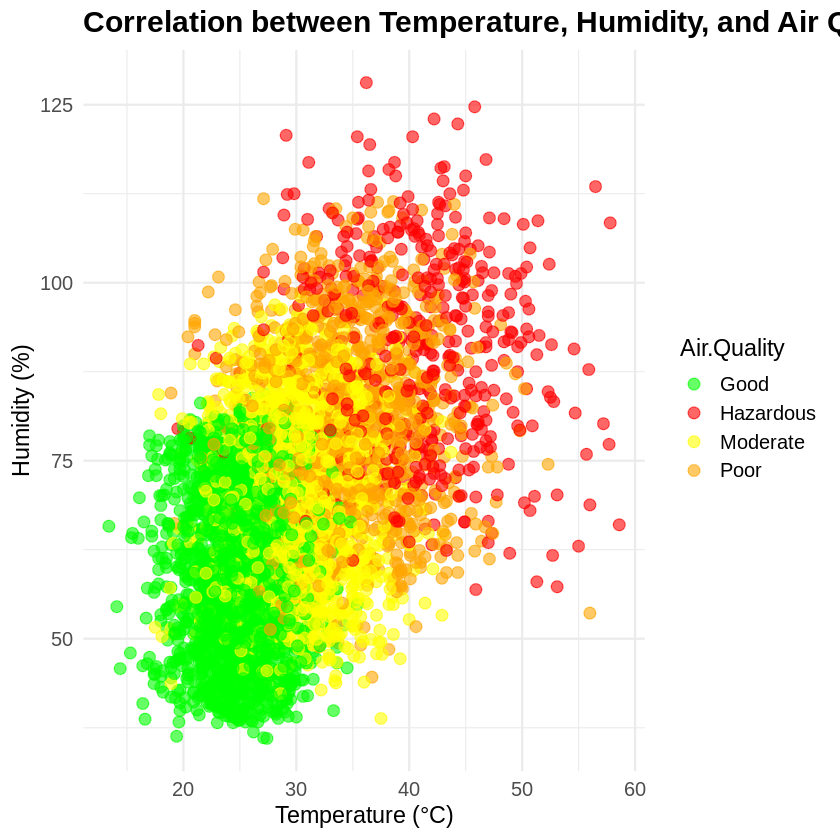

In [ ]:
library(ggplot2)

# Plotting a scatter plot with color representing Air Quality
ggplot(data, aes(x = Temperature, y = Humidity, color = Air.Quality)) +
  geom_point(alpha = 0.6, size = 3) +
  labs(title = "Correlation between Temperature, Humidity, and Air Quality",
       x = "Temperature (°C)", y = "Humidity (%)") +
  scale_color_manual(values = c("Good" = "green", "Moderate" = "yellow", "Poor" = "orange", "Hazardous" = "red")) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )


**Insights**: We can observe how air quality tends to worsen with specific combinations of temperature and humidity. For example, certain temperature and humidity levels may correlate with higher pollution, leading to poorer air quality.

---



> Box Plot between Proximity to Industrial Areas and Air quality



Each box in this plot represents the distribution of **Proximity to Industrial Areas** values for a specific air quality category (Good, Moderate, Poor, Hazardous).
The plot shows the median, quartiles, and outliers for proximity values within each air quality level, providing a clear view of how proximity to industrial areas varies by air quality.

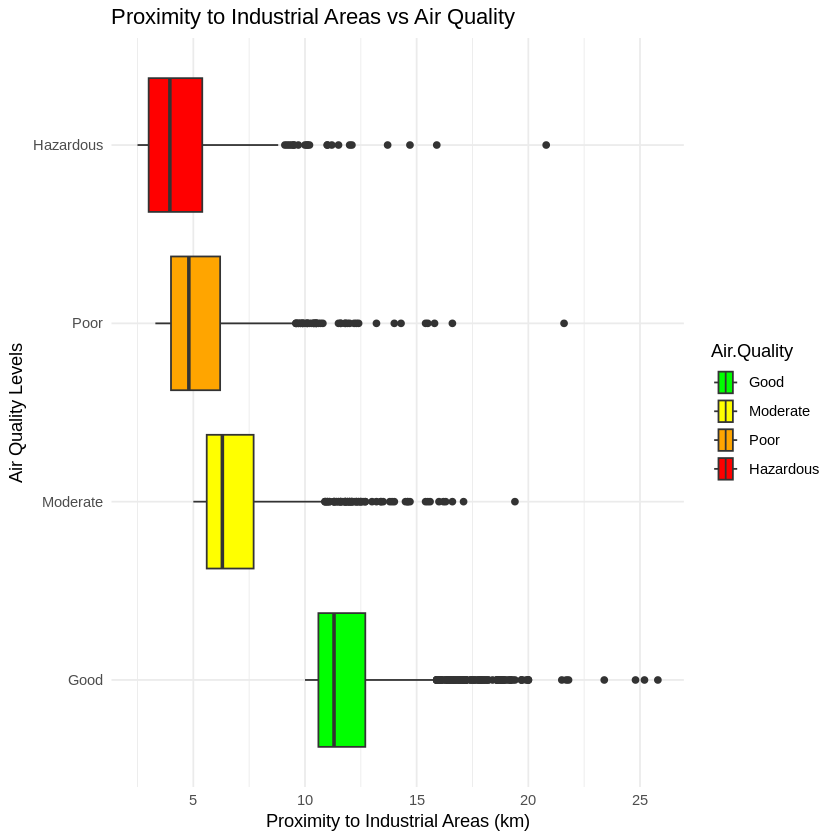

In [25]:
library(ggplot2)

# Plotting the boxplot to show the relationship between Proximity to Industrial Areas and Air Quality
ggplot(data, aes(y = Air.Quality, x = Proximity_to_Industrial_Areas, fill = Air.Quality)) +
  geom_boxplot() +
  labs(title = "Proximity to Industrial Areas vs Air Quality",
       y = "Air Quality Levels", x = "Proximity to Industrial Areas (km)") +
  scale_fill_manual(values = c("Good" = "green", "Moderate" = "yellow", "Poor" = "orange", "Hazardous" = "red")) +
  theme_minimal()


**Insights**:
We observe that areas with poor or hazardous air quality tend to have a smaller median distance to industrial areas, suggesting a strong relationship between industrial proximity and air pollution. It is clear that hazardous air quality is typically found closer to industrial areas. However, the *outliers* in the box plot help us understand cases where proximity to industrial zones is more variable within certain air quality categories, highlighting areas with unusually high pollution levels, even if they are further away from industrial zones.

---



> Violin Plot Between Air Quality and Population Density

Violin plots combine features of boxplots and density plots for a richer
representation of data distribution.
They show the distribution’s density at different values, with the width
representing the frequency.



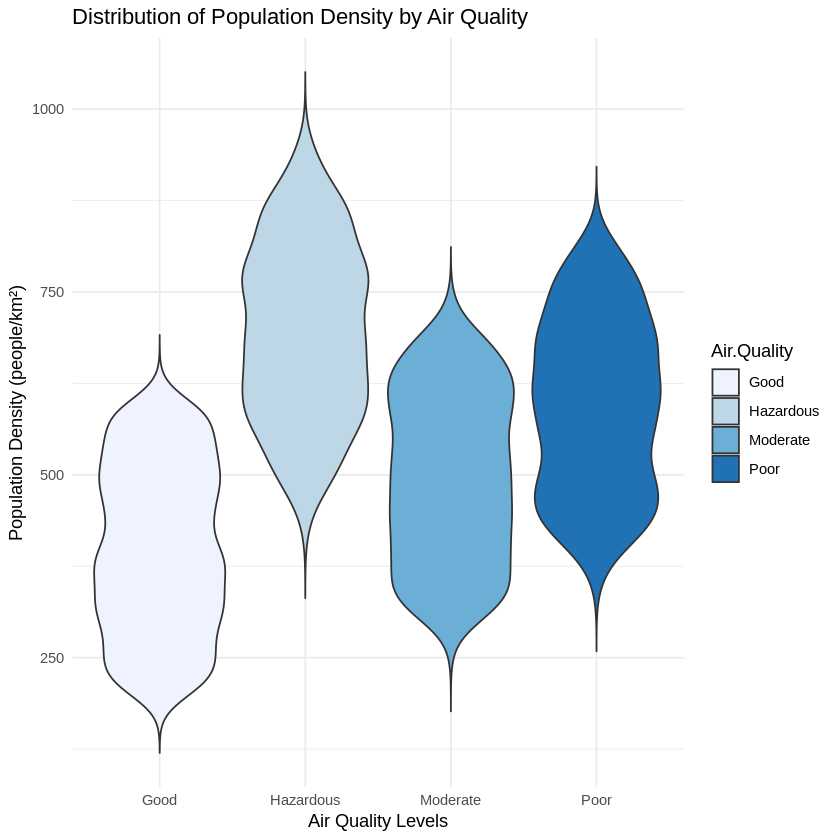

In [3]:
library(ggplot2)
data <- read.csv("pollution_dataset.csv")
ggplot(data, aes(x = Air.Quality, y = Population_Density, fill = Air.Quality)) +
  geom_violin(trim = FALSE, scale = "area") +
  labs(title = "Distribution of Population Density by Air Quality",
       x = "Air Quality Levels", y = "Population Density (people/km²)") +
  scale_fill_brewer(palette = "Blues") +
  theme_minimal()


We can see that there is more population density in Hazardous areas and similarly correlated, but there is not significant difference in population in good and Hazardous areas as the data maybe be biased and conducted in areas with higher population.

---


> Pair Plot and Correlation heatmap




In [2]:
install.packages("GGally")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’




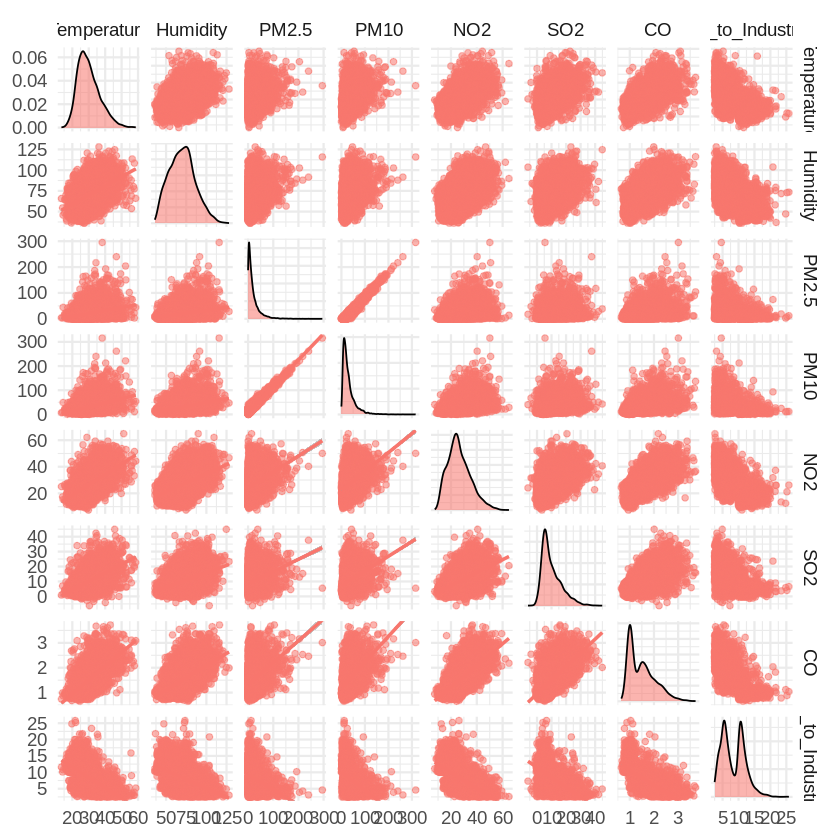

In [15]:
library(GGally)
ggpairs(
  data[, c(1, 2, 3, 4, 5, 6, 7, 8)],
  aes(color = "blue", alpha = 0.6),
  upper = list(continuous = "points"),
  lower = list(continuous = "smooth"),
  diag = list(continuous = "densityDiag")
) +
  theme_minimal(base_size = 14)



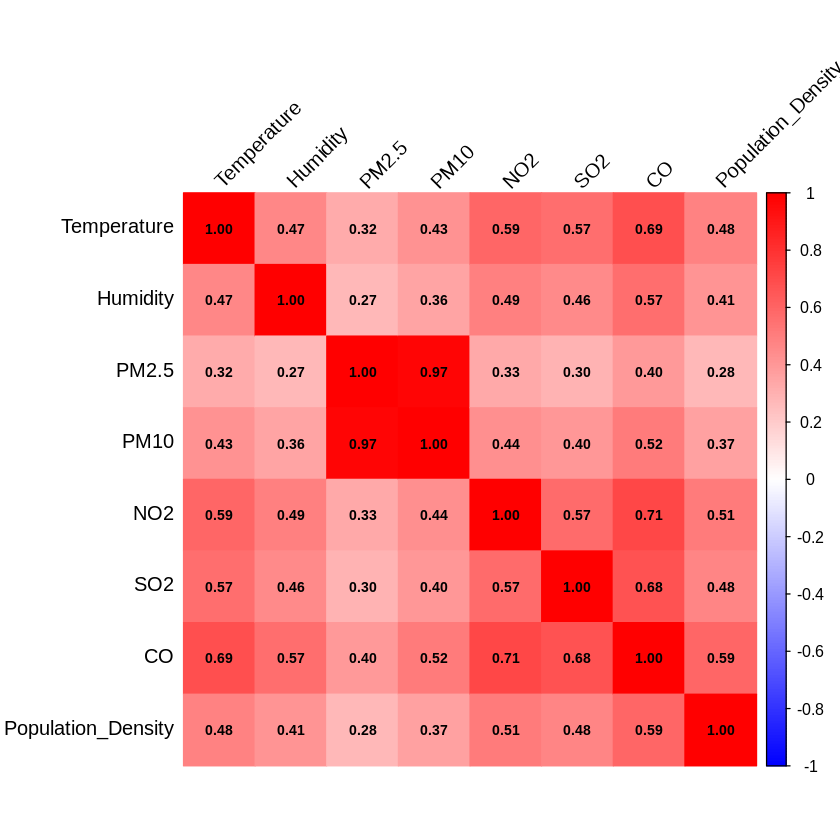

In [18]:
library(ggplot2)
library(corrplot)

data_subset <- data[, c("Temperature", "Humidity", "PM2.5", "PM10", "NO2", "SO2", "CO", "Population_Density")]
cor_matrix <- cor(data_subset)

corrplot(cor_matrix, method = "color", type = "full",
         col = colorRampPalette(c("blue", "white", "red"))(200),
         addCoef.col = "black", tl.col = "black", tl.srt = 45,
         number.cex = 0.7)



**PM2.5 vs PM10:** Strong positive correlation, indicating areas with higher PM2.5 levels also have higher PM10 levels, likely due to shared sources of pollution.
**CO vs Proximity to Industrial Areas: **An inverse relationship, suggesting areas closer to industries tend to have higher CO emissions.
NO2 vs SO2: Moderate clustering, indicating a potential relationship, though not as strong as PM2.5 and PM10.
Density Patterns:

**PM2.5 and PM10:** Similar distribution patterns, possibly due to shared influencing factors.
CO: Skewed distribution, with high levels concentrated in certain areas.
Proximity to Industrial Areas: Uniform distribution, capturing both near and far areas from industrial zones.
Temperature and Humidity:

No strong linear relationships with pollutants, indicating weaker or possibly non-linear dependencies.
Likely act as independent environmental factors indirectly influencing air quality.

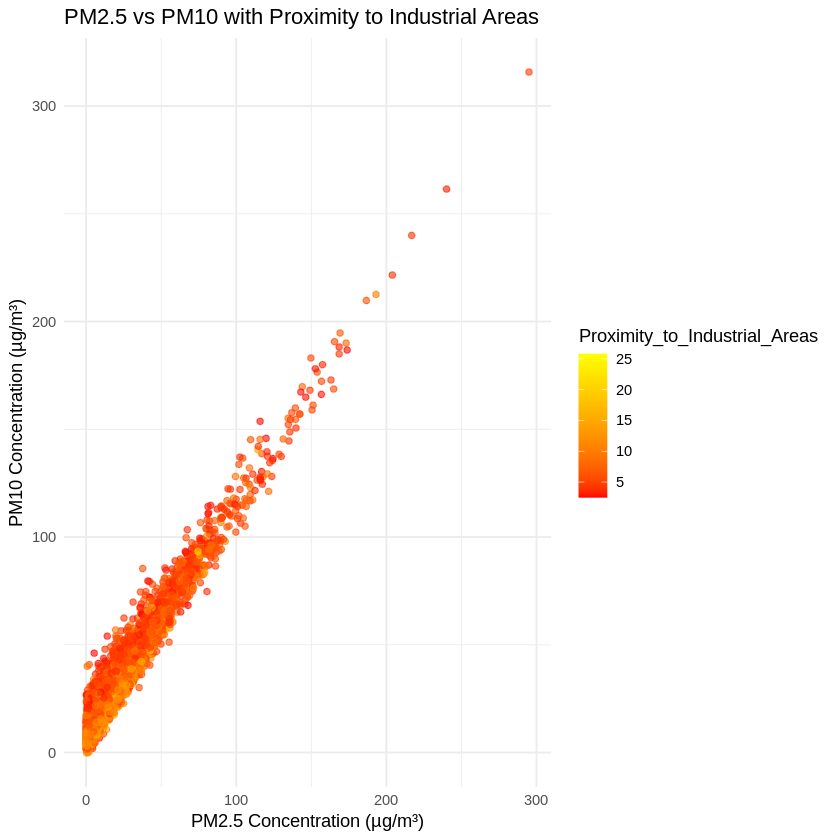

In [11]:
# Scatter plot for PM2.5 vs PM10
ggplot(data, aes(x = `PM2.5`, y = `PM10`)) +
  geom_point(aes(color = `Proximity_to_Industrial_Areas`), alpha = 0.6) +
  labs(title = "PM2.5 vs PM10 with Proximity to Industrial Areas",
       x = "PM2.5 Concentration (µg/m³)", y = "PM10 Concentration (µg/m³)") +
  scale_color_gradient(low = "red", high = "yellow") +
  theme_minimal()


**Insights**:

Strong Positive Correlation:

PM2.5 and PM10 concentrations exhibit a strong positive correlation. As PM2.5 levels increase, PM10 levels also rise proportionally.
This indicates that these two pollutants often coexist in similar proportions and are likely influenced by the same sources, such as industrial activities or vehicular emissions.
Impact of Proximity to Industrial Areas:

The color gradient (ranging from red to yellow) represents the proximity to industrial areas.
Higher pollution levels (PM2.5 and PM10) are associated with closer proximity to industrial zones, as shown by the denser red-colored points in the lower proximity range (closer to 5 km).
Outliers:

A few extreme outliers are observed where PM10 concentrations exceed 300 µg/m³, despite PM2.5 being proportionally lower. This might suggest specific localized events or sources contributing to elevated PM10 levels independently.

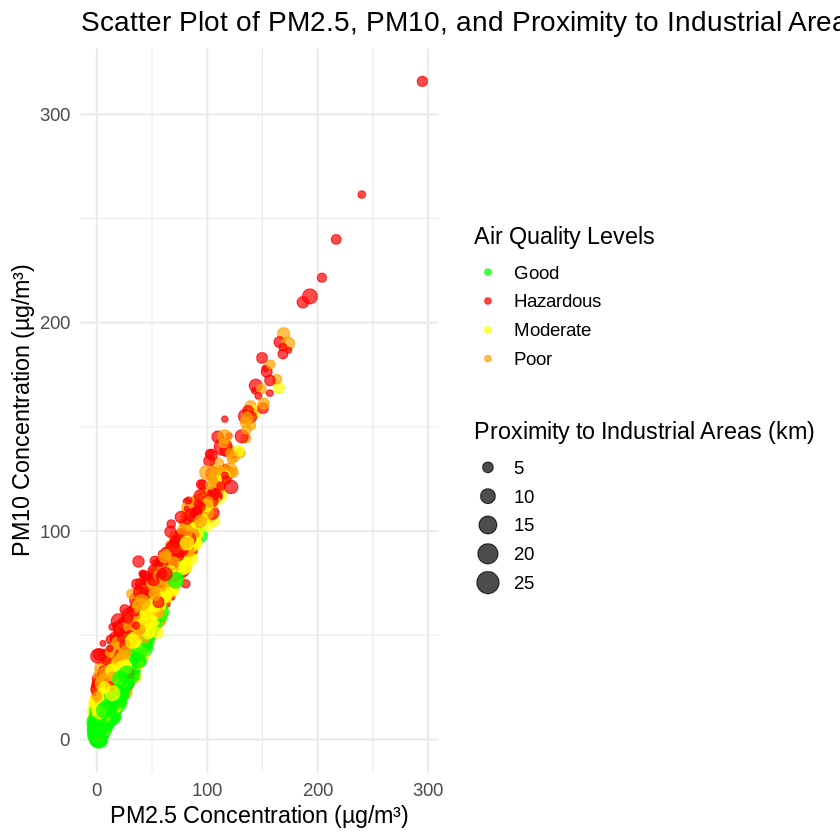

In [12]:
library(ggplot2)
ggplot(data, aes(x = PM2.5, y = PM10, color = Air.Quality, size = Proximity_to_Industrial_Areas)) +
  geom_point(alpha = 0.7) +
  labs(title = "Scatter Plot of PM2.5, PM10, and Proximity to Industrial Areas",
       x = "PM2.5 Concentration (µg/m³)",
       y = "PM10 Concentration (µg/m³)",
       color = "Air Quality Levels",
       size = "Proximity to Industrial Areas (km)") +
  scale_color_manual(values = c("Good" = "green", "Moderate" = "yellow", "Poor" = "orange", "Hazardous" = "red")) +
  theme_minimal(base_size = 14)


Basing on the linear relationship between Pollutant Concentration and Air Quality we can begin building the Prediction Model using Logistic Regression  to understand the baseline relationships between variables, And test with other models also to test Model Accuracy.